In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import linalg
import time

from sklearn.decomposition import dict_learning_online
from sklearn.decomposition import sparse_encode

from sklearn.decomposition._dict_learning_na import sparse_encode_na,\
                                            update1, dict_learning_na,\
                                            update_dict_na


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.decomposition.bench_dict_learning import *

In [10]:
rng_global = np.random.RandomState(0)
n_samples, n_features = 10, 8
n_components = 12
X = rng_global.randn(n_samples, n_features)
code, dict_ = dict_learning_online(X, n_components = n_components, alpha = .0001)

X_na = X.copy()
X_na[0,0] = np.nan
X_na[1,1] = np.nan
Mask = np.where(~np.isnan(X_na))

code, dict_, loss = dict_learning_na(X_na, n_components = n_components, alpha = .0001)

/home/tomtom/Documents/IPython/sklearn/scikit-learn/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.300e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/tomtom/Documents/IPython/sklearn/scikit-learn/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.650e-02, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/tomtom/Documents/IPython/sklearn/scikit-learn/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.405e-03, with an active set of 7 regressors, a

sparse encode took:	 0.0028010129928588865 seconds
sparse encode_na took:	 0.0065012693405151365 seconds
sparse encode took:	 0.05355746746063232 seconds
sparse encode_na took:	 0.09114010334014892 seconds
sparse encode took:	 0.6133667707443238 seconds
sparse encode_na took:	 1.164285922050476 seconds
sparse encode took:	 5.379116725921631 seconds
sparse encode_na took:	 9.49249529838562 seconds


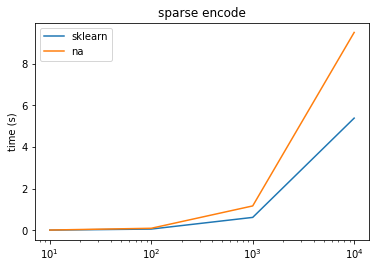

In [3]:
bench_sparse_encode()

In [18]:
bench_dict_learning()

dict_learning took:	 0.29055023193359375 seconds
dict_learning_na took:	 69.42922329902649 seconds
dict_learning took:	 0.36357808113098145 seconds
dict_learning_na took:	 76.81348323822021 seconds
dict_learning took:	 0.7224490642547607 seconds


KeyboardInterrupt: 

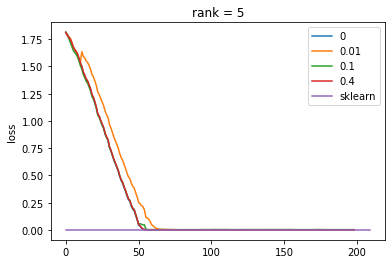

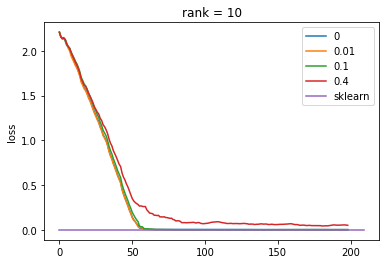

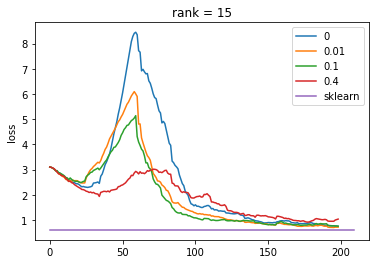

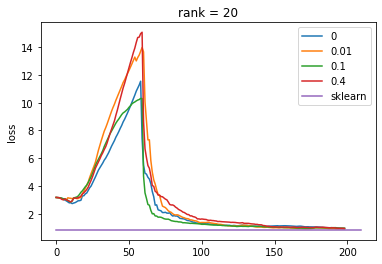

In [17]:
for rank in [5, 10, 15, 20]:
    plt.figure()
    bench_loss(n_samples = 50, n_features = 20,
               rank = rank, n_components = 10)
    plt.title('rank = ' + str(rank))

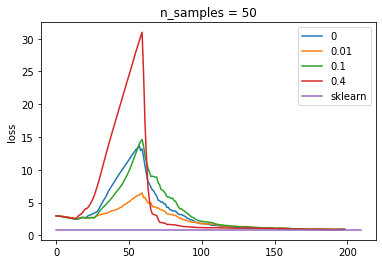

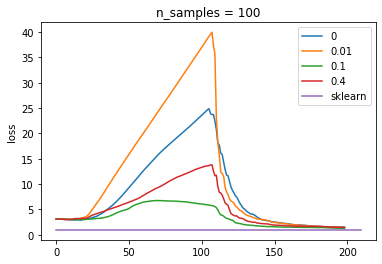

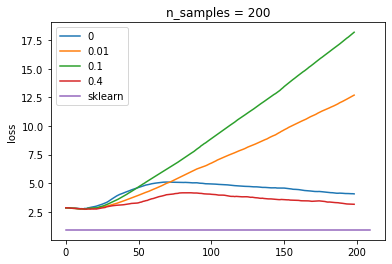

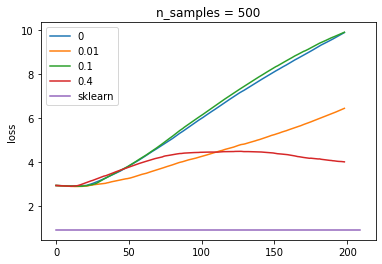

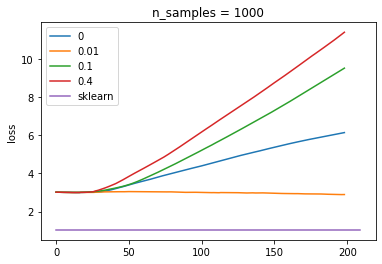

In [19]:
for n_samples in [50, 100, 200, 500, 1000]:
    plt.figure()
    bench_loss(n_samples = n_samples, n_features = 30,
               rank = 15, n_components = 10)
    plt.title('n_samples = ' + str(n_samples))